The goal of this week's workshop is to become familiar with the Pandas `DataFrame` data structure and begin looking at some simple data analysis and visualisation.   We'll look at two sample data sets and perform some analysis on them.

In [1]:
student_name = "Eddie Zeng"
student_id = "44786344"

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Auto MPG Data

Our first exercise is with some data on cars from the US containing information about car size and power and fuel consumption (miles per gallon or mpg).   We'll use this to explore the Pandas `DataFrame` options for selecting and plotting data and for computing statistics over columns. 

First we read the data using `pd.read_table` since the data ([auto-mpg.data](files/auto-mpg.data)) is in a 
space separated tabular format (take a look at the raw data to see what this means).   I've added an 
explicit list of column headings and some options to `read_table` to get the data in the right format.

In [4]:
columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'modelyear', 'origin', 'name']
auto = pd.read_csv('files/auto-mpg.data', delim_whitespace=True,header=None, names=columns)
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


Now that you have the data in a DataFrame, write code in cells below to do the following:

* show the size of the data - how many rows and columns are there?
* select just the `mpg` column, find the mean value of MPG for all cars
* select all rows where the value of cylinders is 6, how many are there?
* what is the mean MPG for 6 cylinder cars?
* create a scatter plot of `mpg` vs `weight`
* create a similar plot but just for the 8 cylinder cars

You might want to refer to the [Pandas Tutorials](http://pandas.pydata.org/pandas-docs/stable/tutorials.html) or 
 [10 Minutes to Pandas](http://pandas.pydata.org/pandas-docs/stable/10min.html) for some hints.

In [13]:
print('The number of columns is:', len(auto.columns), 'and the number of rows is:', len(auto.index))

The number of columns is: 9 and the number of rows is: 392


In [20]:
print('The mean mpg for all cars is:',auto.mpg.mean())
cyl_6 = auto[auto['cylinders']==6]
print('The number of cars with 6 cylinders is:', len(cyl_6))
print('The mean MPG for 6 cylinder cars is:', cyl_6.mpg.mean())

The mean mpg for all cars is: 23.445918367346938
The number of cars with 6 cylinders is: 83
The mean MPG for 6 cylinder cars is: 19.973493975903615


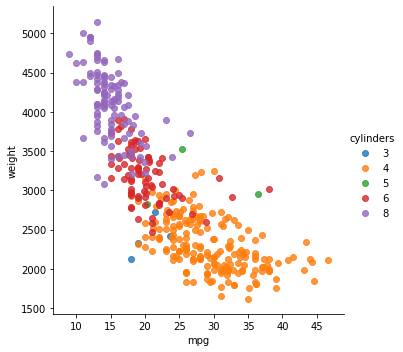

In [23]:
sns.lmplot(x='mpg',y='weight', data=auto, fit_reg=False, hue='cylinders')

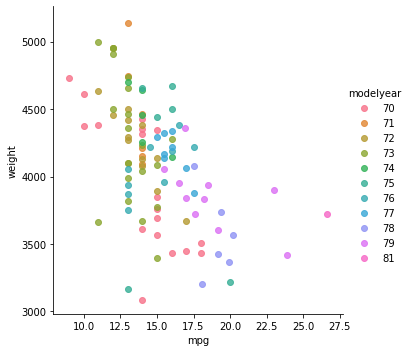

In [25]:
cyl_8 = auto[auto['cylinders']==8]
sns.lmplot(x='mpg',y='weight',data=cyl_8,fit_reg=False, hue='modelyear')

## Adult Data Analysis

Next we'll work with a dataset described in Chapter 3 of the text - the [Adult](https://archive.ics.uci.edu/ml/datasets/Adult) dataset:

> "hosted on the UCI’s Machine Learning Repository.1 It contains approximately 32,000 observations concerning different financial parameters related to the US population: age, sex, marital (marital status of the individual), country, income (Boolean variable: whether the person makes more than $50,000 per annum), education (the highest level of education achieved by the individual), occupation, capital gain, etc.

The data is stored in a file 'files/adult.data' in this repository. It is in CSV format but the text uses a
different method to read it in to a dataframe - the reason is that it is a slightly non-standard format with spaces after the commas.  I've shown an alternate way to read the data below that uses read_csv with appropriate arguments to read the data.  This ensures that it doesn't try to read a header line (since there isn't one) and skips initial spaces in values.  We explicitly set the column names from a list of strings.

In [5]:
column_names = ['age', 'type_employer', 'fnlwgt', 'education', 'education_num', 
                'marital', 'occupation',' relationship', 'race', 'sex', 'capital_gain', 
                'capital_loss', 'hr_per_week', 'country', 'income']

df = pd.read_csv('files/adult.data', header=None, names=column_names, skipinitialspace=True)
df.head()

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Follow the textbook examples to complete the tasks below.  Note that cutting and pasting from the text
is a bit problematic since they use special quote character in the code - if you try to copy-paste the code you'll get syntax errors. Instead, type out the commands, it might help you remember them better too.

The first task is to create separate dataframes for males and females, and for males and females earning over 50K (four dataframes in all).  When you have done this, **display the mean, median and standard deviation of age for each group** (Section 3.3.1).

One criticism I have of the code in the text is that they use very short variable names like df and ml2.  I've called the main dataframe `adult`; I suggest you use slightly longer varible names (`males`, `males_high`) to make your code easier to read - although avoid really long names (`males_with_high_income`) as they can make your code hard to read.

In [6]:
ml = df[(df.sex == 'Male')]
fm = df[(df.sex == 'Female')]
ml_h = df[(df.sex=='Male')&(df.income == '>50K')]
fm_h = df[(df.sex=='Female')&(df.income == '>50K')]
ml_h
fm_h
#print(len(ml),len(fm),len(ml_h),len(fm_h))

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
19,43,Self-emp-not-inc,292175,Masters,14,Divorced,Exec-managerial,Unmarried,White,Female,0,0,45,United-States,>50K
52,47,Private,51835,Prof-school,15,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,1902,60,Honduras,>50K
67,53,Private,169846,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,>50K
84,44,Private,343591,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Female,14344,0,40,United-States,>50K
89,43,Federal-gov,410867,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,50,United-States,>50K
125,47,Private,287828,Bachelors,13,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,>50K
143,45,Private,196584,Assoc-voc,11,Never-married,Prof-specialty,Not-in-family,White,Female,0,1564,40,United-States,>50K
197,40,Federal-gov,56795,Masters,14,Never-married,Exec-managerial,Not-in-family,White,Female,14084,0,55,United-States,>50K
208,58,Self-emp-inc,210563,HS-grad,9,Married-civ-spouse,Sales,Wife,White,Female,15024,0,35,United-States,>50K


In [7]:
ml = df[(df.sex == 'Male')]
fm = df[(df.sex == 'Female')]
ml_h = ml[(ml.income == '>50K')]
fm_h = fm[(fm.income == '>50K')]
print(len(ml),len(fm),len(ml_h),len(fm_h))


21790 10771 6662 1179


Plot the distributions of the ages of males and females in the dataset on a single graph (Section 3.3.2 figure 3.2).  Note that you can do without using the seaborn module as in the example, just use `color='indianred'` instead.  Work out ([from the pandas documentation](http://pandas.pydata.org/pandas-docs/)) how to add labels to the axes in your plot - the code in the chapter doesn't show this.

Compare your plot with the plot in the textbook.  Does it look the same? If it does, then you made the same error as they did. Compare the y-axis in Figures 3.1 and 3.2 (left) for Males; how many males are aged around 30? 

**This week's checkpoint is to identify the bug in the textbook code.  Tell your tutor when you've found it.**

4     28
5     37
6     49
8     31
12    23
Name: age, dtype: int64

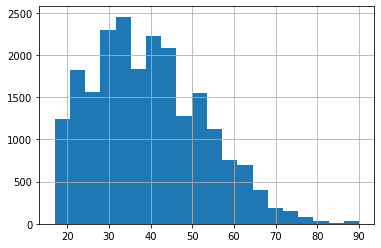

In [8]:
ml_age = ml['age']
ml_age
ml_age.hist(density =0,histtype ='stepfilled',bins=20)
fm_age = fm['age']
fm_age.head()

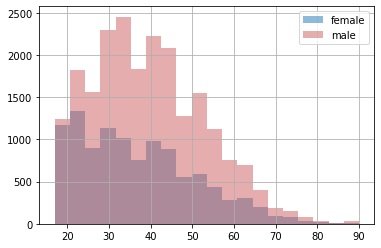

In [120]:
fm_age.hist(density=0,histtype='stepfilled',alpha=.5,bins=20, label='female')
ml_age.hist(density=0,histtype='stepfilled',alpha=.5,color = 'indianred',bins=20,label='male')
plt.legend(loc='upper right')
plt.show()

## Outliers

The text book Section 3.3.3 talks about removing outliers from the data, discarding values that lie a long way from the median or mean value.   For this dataset, they talk about removing any rows where the income is >50K but the age is below 22 or above 72 - basically saying that these values are unlikely to be real.   This is a reasonable thing to do but the code they give for it is buggy.  

They show this formula:

```
df2 = df.drop(df.index[
                      (df.income == ’>50K\n’) &
                      (df[’age’] > df[’age’].median() + 35) & (df[’age’] > df[’age’].median() -15)
])
```

Note that they are dropping from the dataframe `df` any rows where the income is high AND the age is greater than 72 (median + 35) AND the age is greater than 22 (median - 15).   So effectively the last term will have no effect.  
What they really mean is (age > 72) OR (age < 22).  Here are some expressions that express these constraints. I've printed the length of the dataframe after using the boolean expression to select the rows:

In [10]:
print( len( df[(df.income == '>50K')] ))
print( len( df[(df.age > 72)] ))
print( len( df[(df.age < 22)] ))
print( len( df[(df.income == '>50K')  & ((df.age > 72) | (df.age < 22))] ))


7841
401
3130
74


Based on these expressions, we can drop rows outside of the target range using the `drop` method as in the textbook.  Note the use of `adult.index`.  The argument to drop is a series giving the indexes of the rows we want to remove from the dataframe.   So we filter the index of the dataframe using the boolean expression to get this.

In [11]:
# remove outliers - people with high income who are too old or too young
#drops all indices containing adult.index[(...)], adult.index = list of indices
df_clean = df.drop( df.index[(df.income == '>50K') & 
                                      ((df['age'] > 72) | 
                                       (df['age'] < 22))]
                        )

# confirm that we have restricted the range of ages for high earners, should see 
#this line returns a series and then describes that series
df_clean[df_clean.income=='>50K'].age.describe()
#adult_clean

count    7767.000000
mean       43.965495
std        10.044728
min        22.000000
25%        36.000000
50%        43.000000
75%        51.000000
max        72.000000
Name: age, dtype: float64

In [12]:
column_names = ['age', 'type_employer', 'fnlwgt', 'education', 'education_num', 
                'marital', 'occupation',' relationship', 'race', 'sex', 'capital_gain', 
                'capital_loss', 'hr_per_week', 'country', 'income']

df = pd.read_csv('files/adult.data', header=None, names=column_names, skipinitialspace=True)
df.head()

#Data WITH the outliers still intact filtered by sex:

ml = df[df['sex']=='Male']
ml = ml['age']
ml_m = ml.mean()
ml_std = ml.std()
print('Men statistics(with outliers):')
print('Mean:', ml_m)
print('STD:',ml_std)
print('Min:', ml.min(),'Max:',ml.max())
fm = df[df['sex']=='Female']
fm = fm['age']
fm_m = fm.mean()
fm_std = fm.std()
print('Women statistics(with outliers):')
print('Mean:',fm_m)
print('STD:',fm_std)
print('Min',fm.min(),'Max',fm.max())
print('============================================================================================')
#print(ml.tail())
#Data WITHOUT the outliers filtered by sex:

ml1 = df_clean[(df_clean['sex']=='Male')& (df_clean.income =='>50K')]
ml1 = ml1['age']
fm1 = df_clean[(df_clean['sex']=='Female')&(df_clean.income=='>50K')]
fm1 = fm1['age']
ml1_m = ml1.mean()
ml1_std = ml1.std()
fm1_m = fm1.mean()
fm1_std = fm1.std()
print('Men statistics(without outliers):')
print('Mean:', ml1_m)
print('STD:',ml1_std)
print('Min',ml1.min(),'Max:',ml.max())
print('Women statistics(without outliers):')
print('Mean:',fm1_m)
print('STD:',fm1_std)
print('Min',fm1.min(),'Max',fm1.max())
print('==============================================================================================')
print('The mean difference with outliers is: %4.2f.' %(ml_m-fm_m))
print('The mean difference without outliers is: %4.2f.' %(ml1_m-fm1_m))

Men statistics(with outliers):
Mean: 39.43354749885268
STD: 13.370630192526448
Min: 17 Max: 90
Women statistics(with outliers):
Mean: 36.85823043357163
STD: 14.013697099438332
Min 17 Max 90
Men statistics(without outliers):
Mean: 44.325352326110014
STD: 10.012302742491938
Min 22 Max: 90
Women statistics(without outliers):
Mean: 41.93236301369863
STD: 9.98952564884922
Min 22 Max 72
The mean difference with outliers is: 2.58.
The mean difference without outliers is: 2.39.


Note that unlike in the textbook, the minimum age is now 22 (not 19).

Given this filtered dataset, repeat the analysis in the remainder of section 3.3.3 to **determine whether the difference between males and females is changed once outliers are removed**. To do this you will need to compute versions of the male and female high earners age series with and without outliers removed.  You can do this directly from the `adult` and `adult_clean` dataframes.

In [13]:
df_male0 = df[df['sex']=='Male']
df_fmale0=df[df['sex']=='Female']
df_male0 = df_male0['age']
df_fmale0 = df_fmale0['age']
ml_mean0 = df_male0.mean()
fm_mean0 = df_fmale0.mean()
print('Difference in mean from male to female with outliers:', ml_mean0-fm_mean0)
df_male = df_clean[df_clean['sex'] == 'Male']
#print(df_male.head())
df_fmale = df_clean[df_clean['sex']=='Female']
df_fmale
df_male = df_male['age']
df_fmale = df_fmale['age']
ml_mean = df_male.mean()
fm_mean = df_fmale.mean()
print('Difference in mean from male to female without outliers:', ml_mean-fm_mean)
ml_median = df_male.median()
fm_median = df_fmale.median()
ml_std = df_male.std()
fm_std = df_fmale.std()
print('Difference in STD from male to female without outliers:',ml_std-fm_std)
#print(df_male['age'].describe())
#print(df_fmale['age'].describe())
print('The mean difference with outliers is: %4.2f.' %(ml_mean0-fm_mean0))
print('The mean difference without outliers is: %4.2f.' %(ml_mean-fm_mean))

Difference in mean from male to female with outliers: 2.5753170652810553
Difference in mean from male to female without outliers: 2.4953652779514925
Difference in STD from male to female without outliers: -0.74134328426514
The mean difference with outliers is: 2.58.
The mean difference without outliers is: 2.50.


Generate figure 3.5 from the textbook that shows the relative frequency of male an female high earners as a function of age.  Again, label your axes and the plot overall.

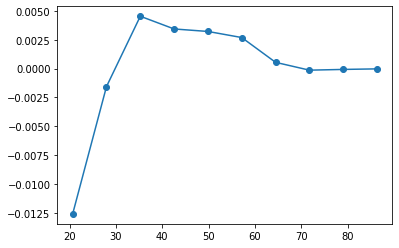

In [14]:
countx,divisionx = np.histogram(df_male,density=True)
county,divisiony = np.histogram(df_fmale,density=True)
val = [(divisionx[i] + divisionx[i+1])/2 for i in range(len(divisionx)-1)]
plt.plot(val,countx-county,'o-')

Finally, use the **Pearson’s median skewness coefficient** from Section 3.3.4 to confirm the difference in the shape of the distribution of male and female age distributions. 

In [15]:
def skewness(x):
    res = 0
    m = x.mean()
    s = x.std()
    for i in x:
        res += (i-m) * (i-m) * (i-m)
    res /= (len(x) * s * s * s)
    return res

print("Skewness of the male population =", skewness(df_male))
print("Skewness of the female population is =", skewness(df_fmale))

Skewness of the male population = 0.48986934280211797
Skewness of the female population is = 0.6704381665396626


Summarise the results of your analysis. Do you reach the same conclusion as the textbook? What if any differences do you observe with the correct removal of outliers?

The numbers differ from the textbook, unsure if I made some mistakes along the way or not. Both deviations are positive, therefore indicating that the distribution skews to the right.


## Challenge

If you complete this work in plenty of time, explore the dataset a little more to 
familiarise yourself with some other features of Pandas dataframes. Example questions might be:

- does education level have an effect on income? Use [groupby](http://pandas.pydata.org/pandas-docs/stable/groupby.html) to look at the different values of the education variable and the number
of records in each group.  Select one or two groups and compare the low and high income bands for these. 
- The `education_num` column is (I think) a numerical measure of the level of education of the person - higher for a higher level of qualification.  Look at the difference in this variable for groups defined by the `marital` variable: are married people more or less highly educated than those who are single?


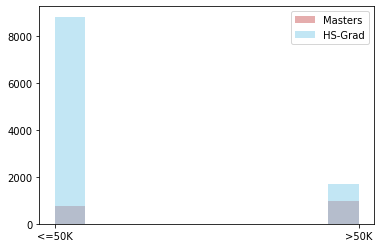

In [45]:
group_by_edu = df.groupby(by=['education','income'])
edu_count = group_by_edu.count()
edu_count
edu_mean = group_by_edu.mean()
edu_mean
edu_count

x1 = df.loc[df.education=='Masters', 'income']
x2 = df.loc[df.education=='HS-grad','income']
plt.hist(x1,alpha=.5,color='indianred',label='Masters')
plt.hist(x2,alpha=.5,color='skyblue',label='HS-Grad')
plt.legend(loc='upper right')



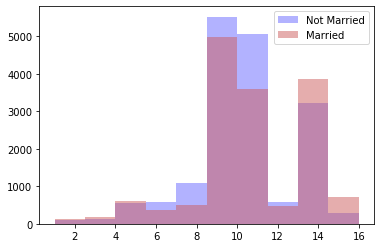

In [64]:
x = df['marital'].unique().tolist()
married = df.loc[df.marital.str.contains("Married"),'education_num'] #Finds all the people who are married.
n_married = df.loc[df.marital.str.contains("Married")==False,'education_num'] #Finds all the people who are not married.
plt.hist(n_married,alpha=.3, color='b',label='Not Married')
plt.hist(married,alpha=.5,color='indianred',label='Married')

plt.legend(loc='upper right')

Bachelors degrees and above are observed to be anything over education_num = 13. 



In [119]:
married = married.map(lambda x: float(x))
n_married = n_married.map(lambda x:float(x))
h_married = married.loc[married>=13] 
l_married = married.loc[married<13]
h_not = n_married.loc[n_married>=13]
l_not = n_married.loc[n_married<13]

print('The percentage of married people with a bachelor\'s degree or higher is: %4.4f.'%(len(h_married)/len(married)),\
      'with', len(h_married), 'married people with a bachelor\'s degree or higher and',\
      len(married),'who have a HS degree or lower')
print('The percentage of non-married people with a bachelor\'s degree or higher is: %4.4f.'%(len(h_not)/len(n_married)),\
      'with', len(h_not), 'non-married people with a bachelor\'s degree or higher and',\
      len(l_not),'who have a HS degree or lower')

The percentage of married people with a bachelor's degree or higher is: 0.2963. with 4568 married people with a bachelor's degree or higher and 15417 who have a HS degree or lower
The percentage of non-married people with a bachelor's degree or higher is: 0.2041. with 3499 non-married people with a bachelor's degree or higher and 13645 who have a HS degree or lower


Therefore married people are more likely to be highly educated as opposed to unmarried people.